In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [3]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [5]:
ind = np.array([[3, 7], [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [6]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [9]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [10]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [11]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [12]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [13]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [14]:
mean = [0, 0]
cov = [[1, 2], [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

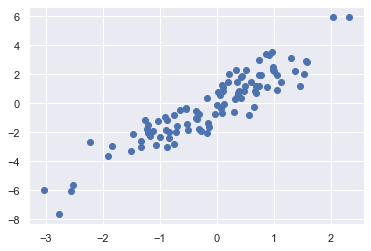

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

In [19]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([58, 35, 60, 10, 24, 25, 34, 43, 87, 98, 16, 94, 71,  0, 56, 15, 89,
       48, 78, 19])

In [20]:
selection = X[indices]  # Тут используется "прихотливая" индексация
selection.shape

(20, 2)

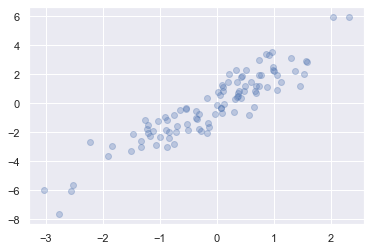

In [22]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', s=200);

In [25]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [26]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [28]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [29]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [30]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [45]:
np.random.seed(94)
x = np.random.randn(100)

# Рассчитываем гистограмму вручную
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# Ищем подходящий интервал для каждого x
i = np.searchsorted(bins, x)

# Добавляем 1 к каждому из интервалов
np.add.at(counts, i, 1)

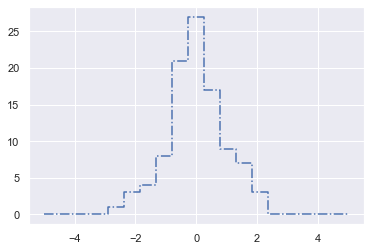

In [55]:
# Visualize
plt.plot(bins, counts, drawstyle='steps', linestyle='-.');
# supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

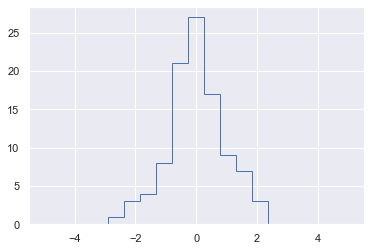

In [57]:
plt.hist(x, bins, histtype='step');

In [58]:
print('NumPy routine:')
%timeit counts, edges = np.histogram(x, bins)
print('Custom routine:')
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
29.3 µs ± 2.12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
14.8 µs ± 204 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [59]:
np.histogram??

In [60]:
x = np.random.randn(1000000)
print('NumPy routine:')
%timeit counts, edges = np.histogram(x, bins)
print('Custom routine:')
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
55.9 ms ± 423 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
110 ms ± 2.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
